# PCA

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [20]:
genes = ['gene'+str(i) for i in range(1,101)]

In [21]:
wt = ['wt'+str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]


In [22]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [23]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10100), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10100), size=5)
    

In [24]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,3789,3757,3806,3816,3803,4954,4815,4891,4806,4940
gene2,8609,8660,8866,8700,8617,5591,5661,5647,5610,5669
gene3,7922,7917,7797,7867,7649,8230,8130,8132,8141,8156
gene4,8268,8381,8622,8522,8520,2802,2734,2773,2700,2800
gene5,38,31,33,24,44,8493,8453,8510,8409,8466


In [25]:
data.shape

(100, 10)

# 🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️

In [26]:
scaled_data = preprocessing.scale(data.T)

# ===××××===

In [27]:
pca = PCA()

In [28]:
pca.fit(scaled_data)

PCA()

In [29]:
pca_data = pca.transform(scaled_data)

In [30]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]

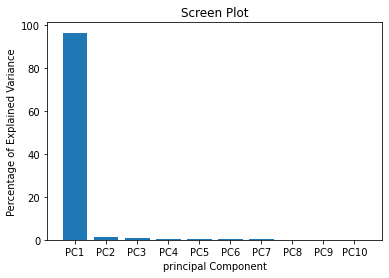

In [31]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("principal Component")
plt.title("Screen Plot")
plt.show()

In [32]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

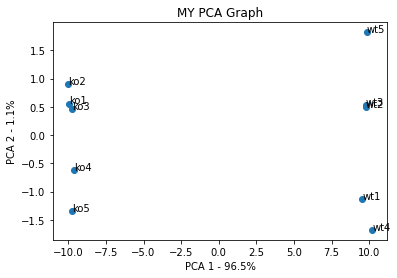

In [33]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("MY PCA Graph")
plt.xlabel(f"PCA 1 - {per_var[0]}%")
plt.ylabel(f"PCA 2 - {per_var[1]}%")

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

# With out Transposing data

In [44]:
scaled_data = preprocessing.scale(data)

In [45]:
pca = PCA()
pca.fit(scaled_data)

PCA()

# 🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️🤷‍♂️

In [46]:
pca_data = pca.transform(scaled_data)

# ===××××===

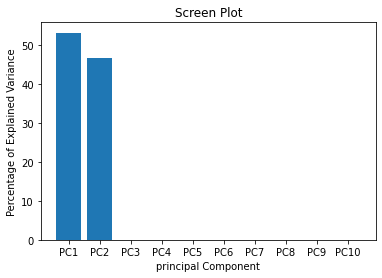

In [47]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("principal Component")
plt.title("Screen Plot")
plt.show()